# Phylum Prediction using Machine Learning

This Machine Learning model adapts a Regression Approach to predict the phylum of a species using thermal.

# Import Necessary Libraries

In [40]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
plt.style.use('seaborn')


C:\Users\User\AppData\Local\Temp\ipykernel_18108\3558860484.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Load the dataset

In [41]:
#Importing dataset
final_df1 = pd.read_csv('cleaned_data1.csv')
print(f"Dataset successfully Imported of Shape : {final_df1.shape}")

Dataset successfully Imported of Shape : (2133, 9)


In [42]:
final_df1 = final_df1.fillna(0)

# Exploratory Data Analysis

In [43]:
# First 5 Columns Data
final_df1.head()

,Tmax,lat_max,long_max,elevation_max,tmin,lat_min,long_min,elevation_min,Phylum
0,35.7,-22.0,-43.50,0.0,8.23,-22.0,-43.50,0.0,Chordata
1,35.1,46.2,-119.00,0.0,1.70,46.2,-119.00,0.0,Chordata
2,44.2,26.0,-97.15,0.0,6.90,26.0,-97.15,0.0,Chordata
3,23.2,52.0,-128.90,0.0,-0.70,52.0,-128.90,0.0,Chordata
4,21.5,52.0,-128.90,0.0,-0.70,52.0,-128.90,0.0,Chordata


In [44]:
# Describing the final_df1set
final_df1.describe()

,Tmax,lat_max,long_max,elevation_max,tmin,lat_min,long_min,elevation_min
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,27.354791,9.401846,-7.695582,210.007894,6.251036,2.568648,3.335903,230.194532
std,16.861315,30.785651,84.739045,522.422446,12.790026,26.959472,77.106452,634.264011
min,0.000000,-77.850000,-161.800000,0.000000,-40.000000,-75.000000,-170.300000,0.000000
25%,16.000000,-4.300000,-78.000000,0.000000,0.000000,-5.310000,-64.060000,0.000000
50%,33.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.500000,35.900000,15.370000,135.000000,14.000000,17.953043,15.400000,4.000000
max,71.500000,79.000000,176.210000,3750.000000,36.000000,79.000000,175.600000,5600.000000


In [45]:
# Information about Each Column
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tmax           2133 non-null   float64
 1   lat_max        2133 non-null   float64
 2   long_max       2133 non-null   float64
 3   elevation_max  2133 non-null   float64
 4   tmin           2133 non-null   float64
 5   lat_min        2133 non-null   float64
 6   long_min       2133 non-null   float64
 7   elevation_min  2133 non-null   float64
 8   Phylum         2133 non-null   object 
dtypes: float64(8), object(1)
memory usage: 150.1+ KB


In [46]:
# Number of Unique Values in each column
final_df1.nunique()

Tmax             404
lat_max          746
long_max         778
elevation_max    279
tmin             416
lat_min          679
long_min         683
elevation_min    218
Phylum            13
dtype: int64

In [47]:
final_df1.Phylum.unique()

array(['Chordata', 'Basidiomycota', 'Arthropoda', 'Echinodermata',
       'Rhodophyta', 'Mollusca', 'Streptophyta', 'Ascomycota', 'Bryozoa',
       'Annelida', 'Phaeophyceae', 'Brachiopoda', 'Chlorophyta'],
      dtype=object)

In [48]:
# ipl_df types of all Columns
final_df1.dtypes

Tmax             float64
lat_max          float64
long_max         float64
elevation_max    float64
tmin             float64
lat_min          float64
long_min         float64
elevation_min    float64
Phylum            object
dtype: object

# Data Cleaning

#### Removing Irrelevant Data colunms

In [49]:
# Names of all columns
final_df1.columns

Index(['Tmax', 'lat_max', 'long_max', 'elevation_max', 'tmin', 'lat_min',
       'long_min', 'elevation_min', 'Phylum'],
      dtype='object')

# Data Preprocessing and Encoding

#### Performing One Hot Encoding and Column Transformation

In [50]:
sc  = StandardScaler()
le = LabelEncoder()
final_df1['Phylum'] = le.fit_transform(final_df1['Phylum'])
X = final_df1.drop(['Phylum'], axis = 1)
y = final_df1['Phylum']

In [51]:
final_df1['Phylum'] = le.fit_transform(final_df1['Phylum'])
final_df1['Phylum'].unique()

array([ 7,  3,  1,  8, 11,  9, 12,  2,  5,  0, 10,  4,  6], dtype=int64)

# Model Building

## Prepare Train and Test Data

In [52]:
features = X
labels = y

In [53]:
print("features", X.columns)

features Index(['Tmax', 'lat_max', 'long_max', 'elevation_max', 'tmin', 'lat_min',
       'long_min', 'elevation_min'],
      dtype='object')


In [54]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (1706, 8)
Testing Set : (427, 8)


## ML  Algorithms

In [55]:
models = dict()

#### 1. Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [57]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 98.68%
Test Score : 65.06%


In [58]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 0.6231264637002342
Mean Squared Error (MSE): 3.8378382172758077
Root Mean Squared Error (RMSE): 1.95904012650987


#### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [60]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 11.39%
Test Score : 9.936%


In [61]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 2.426607401429973
Mean Squared Error (MSE): 9.895453702589045
Root Mean Squared Error (RMSE): 3.1457040074662213


#### Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [63]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 95.37%
Test Score : 77.24%


In [64]:
pickle.dump(forest, open('RandomForestRegression.pkl', 'wb'))

In [65]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.7593444726469962
Mean Squared Error (MSE): 2.5006704005287306
Root Mean Squared Error (RMSE): 1.5813508151351903


#### Support Vector Machine

In [66]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [67]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 4.454%
Test Score : 5.560%


In [68]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 2.1467368856202396
Mean Squared Error (MSE): 10.376233587707452
Root Mean Squared Error (RMSE): 3.2212161659391088


#### XGBoost

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 97.87%
Test Score : 74.59%


In [71]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.8143305959271603
Mean Squared Error (MSE): 2.7913221698257233
Root Mean Squared Error (RMSE): 1.6707250431551337


KNR

In [72]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [73]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 76.49%
Test Score : 64.22%


In [74]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 0.9395784543325527
Mean Squared Error (MSE): 3.930304449648712
Root Mean Squared Error (RMSE): 1.9824995459390935


## Best Model 

<BarContainer object of 6 artists>

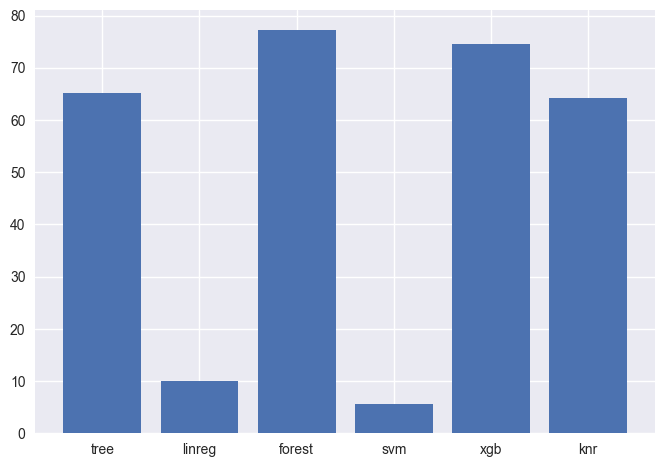

In [75]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

In [76]:
data = pd.read_csv('cleaned_data1.csv')
clf = pickle.load(open('RandomForestRegression.pkl','rb'))

In [77]:
le_d = LabelEncoder()
le_d.fit(data[['Phylum']])

def pred(Tmax,lat_max,long_max,elevation_max,tmin,lat_min,long_min,elevation_min):
    #quali_pos = quali
    prediction = clf.predict([[Tmax,lat_max,long_max,elevation_max,tmin,lat_min,long_min,elevation_min]]).max()

    return prediction

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test 


In [78]:
check = pred('35', '-22', '-43', '0','8','-22','-43','0')
print(check)
if(check >=0 and check<=1) :
 print('Annelida')
elif(check >=1 and check<=2) :
 print('Arthropoda')
elif(check >=2 and check<=3) :
 print('Ascomycota') 
elif(check >=3 and check<=4) :
 print('Basidiomycota')
elif(check >=4 and check<=5) :
 print('Brachiopoda') 
elif(check >=5 and check<=6) :
 print('Bryozoa')
elif(check >=6 and check<=7) :
 print('Chlorophyta') 
elif(check >=7 and check<=8) :
 print('Chordata')
elif(check >=8 and check<=9) :
 print('Echinodermata') 
elif(check >=9 and check<=10) :
 print('Mollusca')
elif(check >=10 and check<=11) :
 print('Phaeophyceae')  
elif(check >=11 and check<=12) :
 print('Rhodophyta') 
elif(check >=12 and check<=13) :
 print('Streptophyta')  

7.621666666666666
Chordata


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
